# Prediction Cost of houses in the city of Medellin Colombia

In [1]:
# Import libraries
#ETL
import pandas as pd
import numpy as np

#Plots
import matplotlib.pyplot as plt
import seaborn as sns

#Predictions
#!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest # Outlier Detection
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
# We read the csv file
df = pd.read_csv('C:/Users/dperez/Documents/DOCUMENTOS DAVID/Analisis Costo Vivienda/datos/med_houseprices.csv')
df.head()

,area,habitaciones,baños,garajes,precio
0,244.0,4,3,1,976.0
1,296.0,5,3,1,890.0
2,200.0,4,6,1,850.0
3,80.0,4,2,0,170.0
4,75.0,2,1,0,210.0


In [3]:
# Centrality and deviation measure for numerical attributes:
df.describe()

,area,habitaciones,baños,garajes,precio
count,9.006000e+03,9006.000000,9006.000000,9006.000000,9.006000e+03
mean,1.765526e+03,3.998779,3.290029,1.203864,1.390068e+03
std,1.067364e+05,1.405983,1.509049,1.423828,1.393501e+04
min,1.245000e+00,0.000000,0.000000,0.000000,2.500000e-01
25%,1.300000e+02,3.000000,2.000000,1.000000,4.500000e+02
50%,2.030000e+02,4.000000,3.000000,1.000000,7.625000e+02
75%,3.180000e+02,5.000000,4.000000,1.000000,1.400000e+03
max,1.000000e+07,23.000000,21.000000,22.000000,1.300000e+06


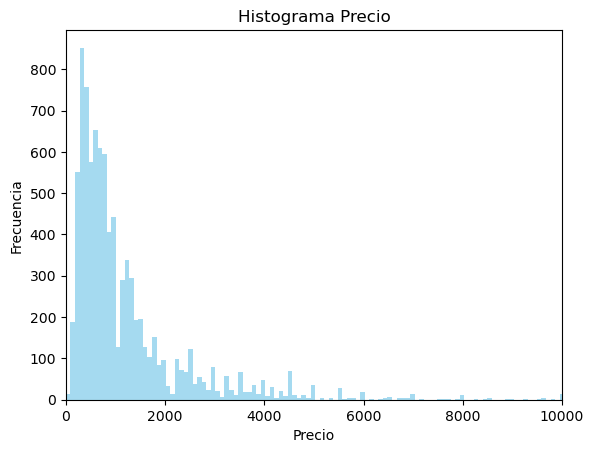

In [4]:
sns.histplot(data=df, x="precio", color="skyblue")

# Establece los límites del eje X
plt.xlim(0, 10000)

# Opcionalmente, puedes agregar un título y etiquetas a los ejes:
plt.title("Histograma Precio")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")

# Muestra el histograma
plt.show()

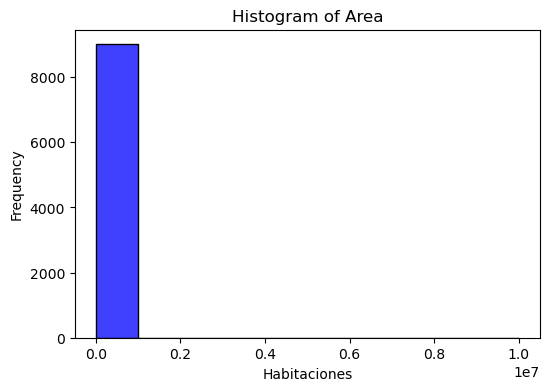

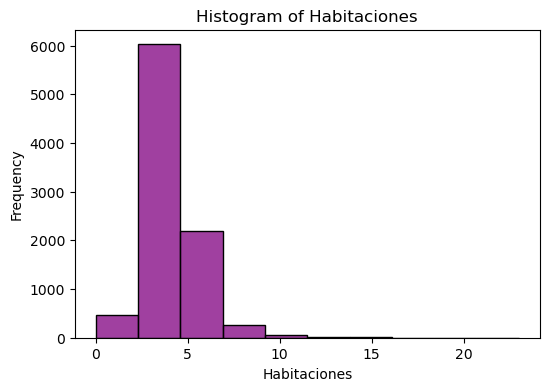

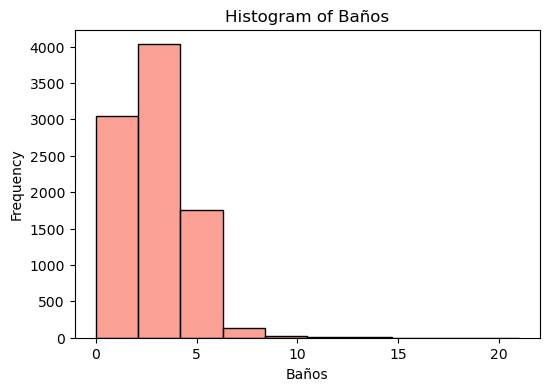

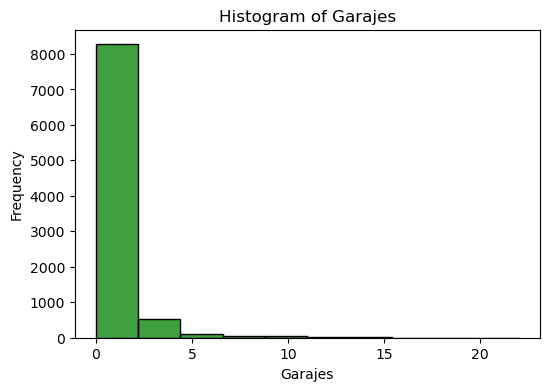

In [5]:
# We plot the distribution for numeric attributes

# Plot histogram for 'habitaciones'
plt.figure(figsize=(6, 4))
sns.histplot(df['area'], bins=10, kde=False, color='blue')
plt.title('Histogram of Area')
plt.xlabel('Habitaciones')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for 'habitaciones'
plt.figure(figsize=(6, 4))
sns.histplot(df['habitaciones'], bins=10, kde=False, color='purple')
plt.title('Histogram of Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for 'baños'
plt.figure(figsize=(6, 4))
sns.histplot(df['baños'], bins=10, kde=False, color='salmon')
plt.title('Histogram of Baños')
plt.xlabel('Baños')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for 'garajes'
plt.figure(figsize=(6, 4))
sns.histplot(df['garajes'], bins=10, kde=False, color='green')
plt.title('Histogram of Garajes')
plt.xlabel('Garajes')
plt.ylabel('Frequency')
plt.show()

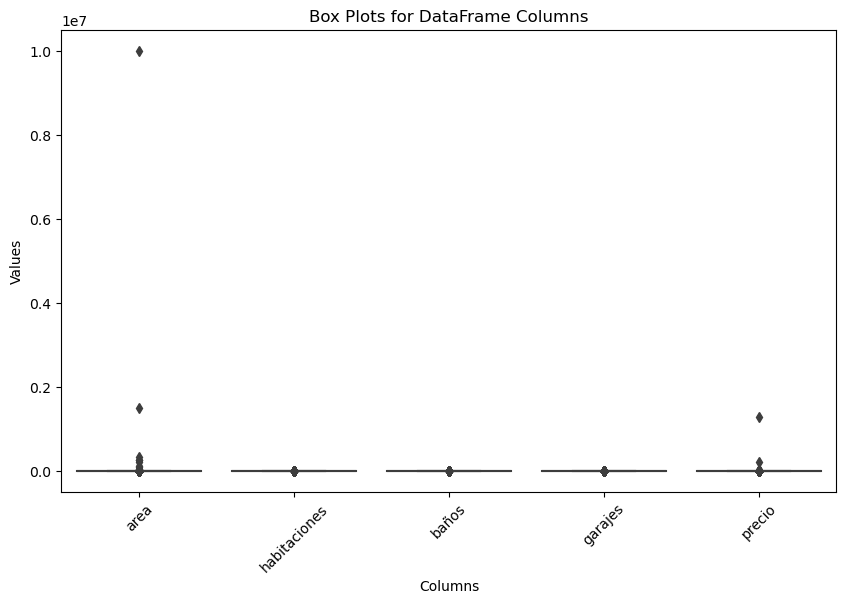

In [6]:
# Create box plots for all columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plots for DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [7]:
# we  remove outliers using the Isolation Forest Algorithm
# Initialize the Isolation Forest Model
clf = IsolationForest(max_samples = 100, random_state = 42)

# Fit the Model to the Data
clf.fit(df)

# Predict Outliers
# The result is an array (y_noano) where each element is either 1 (inlier) or -1 (outlier)
y_noano = clf.predict(df)

# Convert Predictions to DataFrame
y_noano = pd.DataFrame(y_noano, columns = ['Top'])

# Get Indices of Inliers
y_noano[y_noano['Top'] == 1].index.values

# Filter Outliers from the Original Dataset
# The original dataset is filtered to keep only the rows identified as inliers by using the indices of Inliers
df = df.iloc[y_noano[y_noano['Top'] == 1].index.values]

# Reset Index
df.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", df.shape[0])

Number of Outliers: 1288
Number of rows without outliers: 7718


In [8]:
df.shape

(7718, 5)

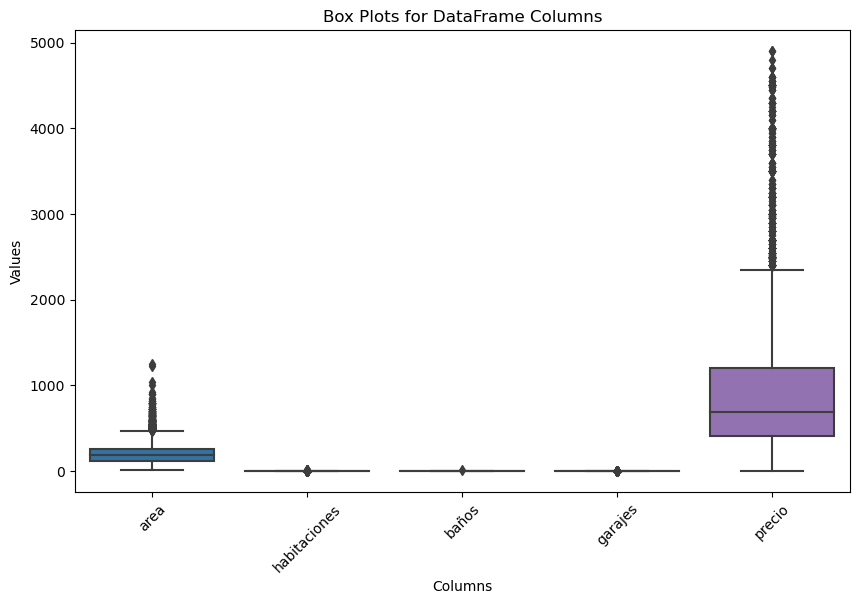

In [9]:
# Create box plots for all columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plots for DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

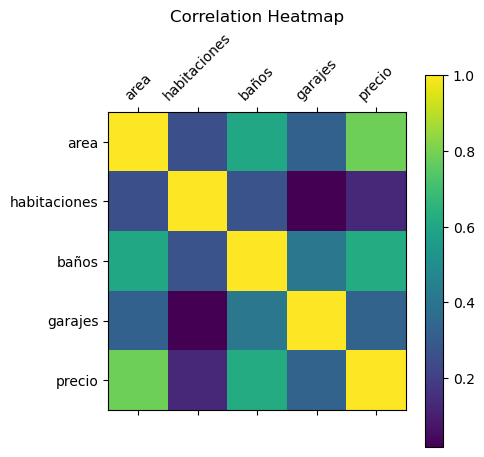

In [10]:
# Correlation matrix
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap visualization
plt.matshow(correlation_matrix)
plt.title("Correlation Heatmap")
plt.xticks(range(len(df.columns)), df.columns, rotation=45)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

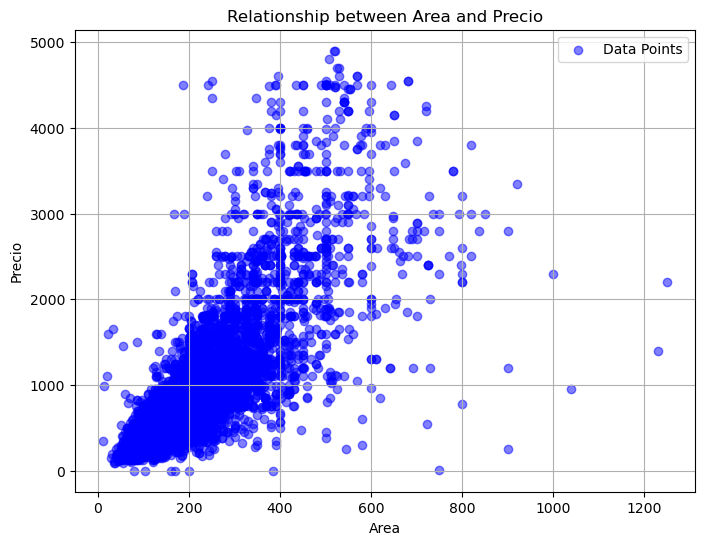

In [11]:
# Create a scatter plot with labels
plt.figure(figsize=(8, 6))
plt.scatter(df['area'], df['precio'], color='blue', alpha=0.5, label='Data Points')
plt.title('Relationship between Area and Precio')
plt.xlabel('Area')
plt.ylabel('Precio')
plt.grid(True)

# Add legend
plt.legend()

plt.show()

## Linear regresion

In [12]:
# Define features and target variable
X = df.drop(columns=['precio'])
y = df['precio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize features before feeding into the pipeline
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
y_train = y_train

In [14]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('regressor', LinearRegression())
])

pipeline.fit(X_scaled, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [15]:
# Define hyperparameters to tune
parameters = {
    'regressor__fit_intercept': [True, False]
}

In [16]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [17]:
#Get the best model
best_model = grid_search.best_estimator_

#Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative Mean Squared Error):", grid_search.best_score_)

Best Parameters: {'regressor__fit_intercept': True}
Best Score (Negative Mean Squared Error): -197939.84059646065


In [18]:
# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print("Test Set Score (R^2):", test_score)

Test Set Score (R^2): 0.6839672139226698


In [19]:
model = best_model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 170890.9838257218


## Modeling XGBoost regressor

In [20]:
# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',  # For regression problems
    colsample_bytree=0.3,  # Fraction of features to be randomly sampled for each tree
    learning_rate=0.1,  # Step size shrinkage used to prevent overfitting
    max_depth=5,  # Maximum depth of a tree
    alpha=10,  # L1 regularization term on weights (similar to Lasso regression)
    random_state=42,
    n_estimators=100  # Number of boosting rounds
)

In [21]:
# Train the XGBoost model
xgb_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [22]:
# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 164479.37595346384


## Tuning Hyperparameters

In [24]:
# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.3, 0.5, 0.7]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative mean squared error as the scoring metric
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use all available CPU cores
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Best Hyperparameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Mean Squared Error on Test Set: 143075.79037432006


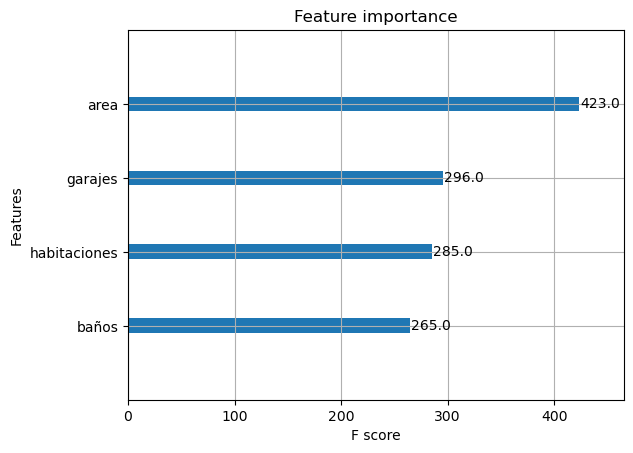

In [27]:
# We plot the features importance top ten

from xgboost import plot_importance

# Plot feature importance
plot_importance(best_model,max_num_features=10)
plt.show()